In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [63]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#View column names for Station
[cname for cname in Measurement.__dict__.keys()]

['__table__',
 '__module__',
 '__doc__',
 '_sa_class_manager',
 '__init__',
 'id',
 'station',
 'date',
 'prcp',
 'tobs',
 '__mapper__']

In [11]:
#View column names for Station
[cname for cname in Station.__dict__.keys()]

['__table__',
 '__module__',
 '__doc__',
 '_sa_class_manager',
 '__init__',
 'id',
 'station',
 'name',
 'latitude',
 'longitude',
 'elevation',
 '__mapper__']

In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18c5fa4fac0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [13]:
inspector = inspect(engine)

station_columns = inspector.get_columns('measurement')
for c in station_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18c5fa8fa90>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [15]:
session = Session(engine)

results = session.query(Station.station).group_by(Station.station).all()

session.close()

stations = []
for station in results:
        stations_dict = {}
        stations_dict["Station"] = station
        stations.append(stations_dict)

        
stations[0:]

[{'Station': ('USC00511918',)},
 {'Station': ('USC00513117',)},
 {'Station': ('USC00514830',)},
 {'Station': ('USC00516128',)},
 {'Station': ('USC00517948',)},
 {'Station': ('USC00518838',)},
 {'Station': ('USC00519281',)},
 {'Station': ('USC00519397',)},
 {'Station': ('USC00519523',)}]

In [16]:
session = Session(engine)

final_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
final_date = dt.datetime.strptime(final_date[0], '%Y-%m-%d')
query_date = dt.date(final_date.year -1, final_date.month, final_date.day)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

session.close()

precip = []
for date, prcp in results:
        precip_dict = {}
        precip_dict["Date"] = date
        precip_dict["Precipitation"] = prcp
        precip.append(precip_dict)
        
precip

[{'Date': '2016-08-23', 'Precipitation': 0.0},
 {'Date': '2016-08-24', 'Precipitation': 0.08},
 {'Date': '2016-08-25', 'Precipitation': 0.08},
 {'Date': '2016-08-26', 'Precipitation': 0.0},
 {'Date': '2016-08-27', 'Precipitation': 0.0},
 {'Date': '2016-08-28', 'Precipitation': 0.01},
 {'Date': '2016-08-29', 'Precipitation': 0.0},
 {'Date': '2016-08-30', 'Precipitation': 0.0},
 {'Date': '2016-08-31', 'Precipitation': 0.13},
 {'Date': '2016-09-01', 'Precipitation': 0.0},
 {'Date': '2016-09-02', 'Precipitation': 0.0},
 {'Date': '2016-09-03', 'Precipitation': 0.0},
 {'Date': '2016-09-04', 'Precipitation': 0.03},
 {'Date': '2016-09-05', 'Precipitation': None},
 {'Date': '2016-09-06', 'Precipitation': None},
 {'Date': '2016-09-07', 'Precipitation': 0.05},
 {'Date': '2016-09-08', 'Precipitation': 0.0},
 {'Date': '2016-09-09', 'Precipitation': 0.03},
 {'Date': '2016-09-10', 'Precipitation': 0.0},
 {'Date': '2016-09-11', 'Precipitation': 0.05},
 {'Date': '2016-09-12', 'Precipitation': 0.0},
 {'

# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database and save as 
final_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
final_date = dt.datetime.strptime(final_date[0], '%Y-%m-%d')
query_date = dt.date(final_date.year -1, final_date.month, final_date.day)

In [18]:
# Perform a query to retrieve the data and precipitation scores
final_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column, remove missing entries
precip_df = pd.DataFrame(final_year, columns=['Date','Precipitation']).set_index('Date').dropna()

# Sort the dataframe by date
precip_df = precip_df.sort_values('Date', ascending=True)

# Display df head
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


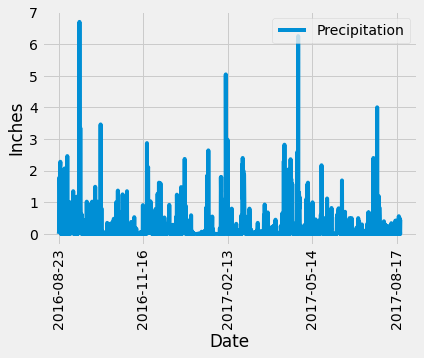

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).group_by(Station.station).count()
print(f'There are {station_count} stations in the dataset')

There are 9 stations in the dataset


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_frequency = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_frequency

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = station_frequency[0][0]

sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == active_station).all()      

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
active_tobs = session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.station == active_station).filter(Measurement.date >= query_date).all()
active_tobs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

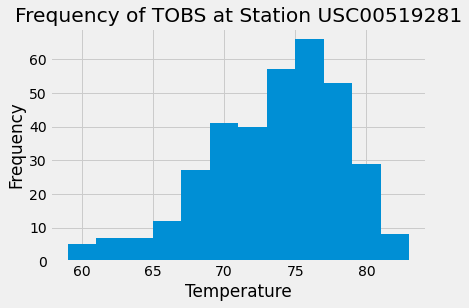

In [25]:
# Plot the results as a histogram
active_tobs_df = pd.DataFrame(active_tobs)
active_tobs_df.plot(kind='hist', bins=12)
plt.legend().remove()
plt.xlabel('Temperature')
plt.title(f'Frequency of TOBS at Station {active_station}')
plt.show()

## Bonus Challenge Assignment

In [78]:
#Temperature Analysis I
#Determine average temps for the month of June and the Month of December
june_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "06").all()
dec_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "12").all()

print(f'The avg temp in June is: {round(june_avg[0][0],2)} degrees')
print(f'The avg temp in December is: {round(dec_avg[0][0],2)} degrees')

The avg temp in June is: 74.94 degrees
The avg temp in December is: 71.04 degrees


In [79]:
# perform t test t compare difference in means between June and Dec
june_temps = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
dec_temps = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()

#Use unpaired t-test as data samples are independent 
stats.ttest_ind(june_temps, dec_temps)

Ttest_indResult(statistic=array([31.60372399]), pvalue=array([3.9025129e-191]))

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [80]:
#Temperature Analysis II

# Set the start and end date of the trip

start_date = '2017-05-22'
end_date = '2017-05-29'

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.

session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

[(69.0, 75.26086956521739, 87.0)]

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date =


# Use the start and end date to create a range of dates



# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [33]:
# Plot the daily normals as an area plot with `stacked=False`
